In [34]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [35]:
learning_rate=0.01   # Learning rate or rate at which the weight changes
training_epochs=1000 # Number of times the training the data to the neural network
display_step=50

In [36]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [37]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [38]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [39]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.102555111 W= 0.33911753 b= 0.1574377
Epoch: 0100 cost= 0.099597193 W= 0.33379307 b= 0.19574124
Epoch: 0150 cost= 0.096981093 W= 0.32878536 b= 0.23176672
Epoch: 0200 cost= 0.094667368 W= 0.3240755 b= 0.2656495
Epoch: 0250 cost= 0.092621036 W= 0.3196456 b= 0.29751718
Epoch: 0300 cost= 0.090811267 W= 0.31547928 b= 0.32748944
Epoch: 0350 cost= 0.089210734 W= 0.31156078 b= 0.35567883
Epoch: 0400 cost= 0.087795213 W= 0.30787528 b= 0.38219202
Epoch: 0450 cost= 0.086543381 W= 0.30440894 b= 0.40712842
Epoch: 0500 cost= 0.085436322 W= 0.30114895 b= 0.43058133
Epoch: 0550 cost= 0.084457316 W= 0.29808268 b= 0.45263934
Epoch: 0600 cost= 0.083591528 W= 0.29519877 b= 0.47338617
Epoch: 0650 cost= 0.082825884 W= 0.2924863 b= 0.4928993
Epoch: 0700 cost= 0.082148857 W= 0.28993538 b= 0.51125056
Epoch: 0750 cost= 0.081550188 W= 0.28753608 b= 0.5285113
Epoch: 0800 cost= 0.081020787 W= 0.2852794 b= 0.5447457
Epoch: 0850 cost= 0.080552675 W= 0.28315687 b= 0.5600148
Epoch: 0900 cost= 0.0801

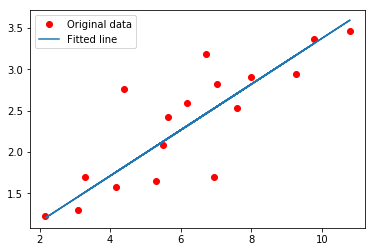

In [40]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
        

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()